In [1]:
from pathlib import Path

parent_dir = str(Path.cwd().parent)
%cd $parent_dir

D:\OrenRichter\Research\pyERGM


D:\OrenRichter\Research\pyERGM\venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import f
from metrics import *
from utils import *
from ergm import ERGM

In [3]:
# Matrix copied manually, TODO - Create a `data` dir in our project and save as a pickle or something.
sampson_matrix = np.array(
    [[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
     [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
     [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
     [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
     [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
     [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
     [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
     [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
     [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
     [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]]
)


In [5]:
n = sampson_matrix.shape[0]
is_directed = True

estimated_p_seed = np.sum(sampson_matrix) / (n * (n - 1))

metrics = [NumberOfEdgesDirected(), OutDegree(), InDegree()]

model = ERGM(n, metrics, is_directed=is_directed)
model.fit(sampson_matrix)
observed_features = model._network_statistics.calculate_statistics(sampson_matrix)

Removing the 0 feature of outdegree to fix multi-collinearity
Removing the 0 feature of indegree to fix multi-collinearity
Model is dyadic independent - using only MPLE instead of MCMLE


In [6]:
sample_sizes = 1000 * np.array([1, 3, 10, 30, 100], dtype=int)

In [11]:
hotteling_statistics_exact_samples = np.zeros(sample_sizes.size)
for i in range(sample_sizes.size):
    cur_sample = model.generate_networks_for_sample(sampling_method='exact',
                                                           sample_size=sample_sizes[i])
    print(f"sampled {sample_sizes[i]} networks")
    cur_sample_features = model._network_statistics.calculate_sample_statistics(cur_sample)
    print(f"calculated statistics for sample")
    hotteling_statistics_exact_samples[i] = calc_hotteling_statistic_for_sample(
        observed_features,
        cur_sample_features,
        'multivariate_initial_sequence')
    print(f"calculated hotteling for sample")

sampled 1000 networks
calculated statistics for sample
calculated hotteling for sample
sampled 3000 networks
calculated statistics for sample
calculated hotteling for sample
sampled 10000 networks
calculated statistics for sample
calculated hotteling for sample
sampled 30000 networks
calculated statistics for sample
calculated hotteling for sample
sampled 100000 networks
calculated statistics for sample
calculated hotteling for sample


In [13]:
hotteling_statistics_mcmc_samples = np.zeros(sample_sizes.size)
for i in range(sample_sizes.size):
    cur_sample = model.generate_networks_for_sample(sampling_method='metropolis_hastings',
                                                           seed_network=sampson_matrix,
                                                           burn_in=1000,
                                                           # Probably not really needed, as we can sample exactly from the distribution, but here to imitate exactly what goes on in ERGM.fit() 
                                                           mcmc_steps_per_sample=n,
                                                           sample_size=sample_sizes[i])
    print(f"sampled {sample_sizes[i]} networks")
    cur_sample_features = model._network_statistics.calculate_sample_statistics(cur_sample)
    print(f"calculated statistics for sample")
    hotteling_statistics_mcmc_samples[i] = calc_hotteling_statistic_for_sample(
        observed_features,
        cur_sample_features,
        'multivariate_initial_sequence')
    print(f"calculated hotteling for sample")

sampled 1000 networks
calculated statistics for sample
calculated hotteling for sample
sampled 3000 networks
calculated statistics for sample
calculated hotteling for sample
sampled 10000 networks
calculated statistics for sample
calculated hotteling for sample
sampled 30000 networks
calculated statistics for sample
calculated hotteling for sample
sampled 100000 networks
calculated statistics for sample
calculated hotteling for sample


In [23]:
confidence_for_convergence = 0.9
hotteling_critical_values = np.zeros(sample_sizes.size)
num_features = model._network_statistics.num_of_features
for i in range(sample_sizes.size):
    hotteling_critical_values[i] = f.ppf(1 - confidence_for_convergence, num_features,
                                         sample_sizes[i] - num_features)

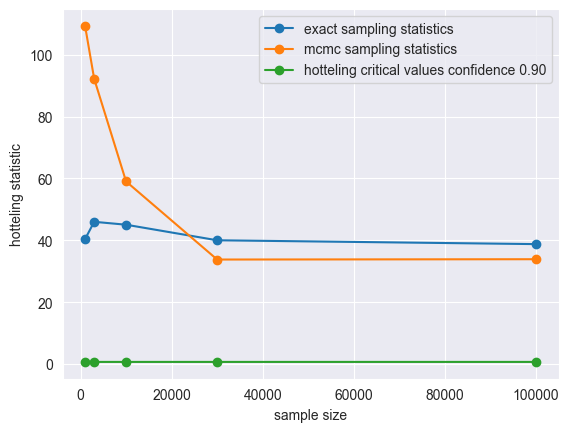

In [24]:
plt.plot(sample_sizes, hotteling_statistics_exact_samples, marker='o', label='exact sampling statistics')
plt.plot(sample_sizes, hotteling_statistics_mcmc_samples, marker='o', label='mcmc sampling statistics')
plt.plot(sample_sizes, hotteling_critical_values, marker='o',
         label=f'hotteling critical values confidence {confidence_for_convergence:.2f}')
plt.xlabel('sample size')
plt.ylabel('hotteling statistic')
plt.legend()
plt.show()